Plot pdfs and means of MMT.

In [1]:
import numpy as np
import xarray as xr
import cmocean as cmocean
import numpy.linalg as la
from scipy.io import netcdf
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from xgcm import Grid
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.colors import SymLogNorm, BoundaryNorm
from matplotlib.ticker import LogFormatter
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern Roman']

In [2]:
def get_colors_from_cmap(cmap_name, n_colors):
    cmap = cm.get_cmap(cmap_name)
    return [cmap(i / (n_colors - 1)) for i in range(n_colors)]

blues   = get_colors_from_cmap('Blues', 10)
reds = ['#f69a8b', '#b91a38']
greys = get_colors_from_cmap('Greys', 10)

colorlist_p5 = [blues[4], reds[0]]
colorlist_p25 = [blues[8], reds[1]]
colorlist_p03125 = [greys[3], greys[5], 'k']

/state/partition1/job-65613382/ipykernel_2744575/3569882092.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)


In [3]:
# Snapshot
root = '/scratch/mp6191/NW2_TracerBackscatter'
name = '__xarray_dataarray_variable__'

exp = '/p5_noBS_KHTR0_2'
p5_noBS_kappa1 = xr.open_dataset(root + exp + '/MMT_kappa1_corr.nc', decode_times = False).kappa1.T.load()
p5_noBS_kappa2 = xr.open_dataset(root + exp + '/MMT_kappa2_corr.nc', decode_times = False).kappa2.T.load()
p5_noBS_kappa1_err = xr.open_dataset(root + exp + '/MMT_kappa1_err.nc', decode_times = False)[name].T.load()
p5_noBS_kappa2_err = xr.open_dataset(root + exp + '/MMT_kappa2_err.nc', decode_times = False)[name].T.load()
p5_noBS_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time').load()
p5_noBS = xr.open_mfdataset(root + exp + '/snapshots*.nc', decode_times = False)
p5_static = xr.open_dataset(root + exp + '/static.nc', decode_times = False)
p5_IC = xr.open_dataset(root + exp + '/MOM_IC.nc', decode_times = False).isel(Time = -1).rename({'Interface': 'zi', 'Layer': 'zl', 'latq': 'yq', 'lath': 'yh', 'lonh': 'xh', 'lonq': 'xq'})
p5_eta = p5_IC.eta

exp = '/p5_SQGBS_KHTR0_2'
p5_SQGBS_kappa1 = xr.open_dataset(root + exp + '/MMT_kappa1_corr.nc', decode_times = False).kappa1.T.load()
p5_SQGBS_kappa2 = xr.open_dataset(root + exp + '/MMT_kappa2_corr.nc', decode_times = False).kappa2.T.load()
p5_SQGBS_kappa1_err = xr.open_dataset(root + exp + '/MMT_kappa1_err.nc', decode_times = False)['kappa1'].T.load()
p5_SQGBS_kappa2_err = xr.open_dataset(root + exp + '/MMT_kappa2_err.nc', decode_times = False)['kappa2'].T.load()
p5_SQGBS_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time').load()
p5_SQGBS = xr.open_mfdataset(root + exp + '/snapshots*.nc', decode_times = False)

exp = '/p25_noBS_2'
p25_noBS_kappa1 = xr.open_dataset(root + exp + '/MMT_kappa1_corr.nc', decode_times = False).kappa1.T.load()
p25_noBS_kappa2 = xr.open_dataset(root + exp + '/MMT_kappa2_corr.nc', decode_times = False).kappa2.T.load()
p25_noBS_kappa1_err = xr.open_dataset(root + exp + '/MMT_kappa1_err.nc', decode_times = False)[name].T.load()
p25_noBS_kappa2_err = xr.open_dataset(root + exp + '/MMT_kappa2_err.nc', decode_times = False)[name].T.load()
p25_noBS_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time').load()
p25_noBS = xr.open_mfdataset(root + exp + '/snapshots*.nc', decode_times = False)
p25_static = xr.open_dataset(root + exp + '/static.nc', decode_times = False)
p25_IC = xr.open_dataset(root + '/p25_SpinUp' + '/MOM_IC.nc', decode_times = False).isel(Time = -1).rename({'Interface': 'zi', 'Layer': 'zl', 'latq': 'yq', 'lath': 'yh', 'lonh': 'xh', 'lonq': 'xq'})
p25_eta = p25_IC.eta

exp = '/p25_SQGBS_2'
p25_SQGBS_kappa1 = xr.open_dataset(root + exp + '/MMT_kappa1_corr.nc', decode_times = False).kappa1.T.load()
p25_SQGBS_kappa2 = xr.open_dataset(root + exp + '/MMT_kappa2_corr.nc', decode_times = False).kappa2.T.load()
p25_SQGBS_kappa1_err = xr.open_dataset(root + exp + '/MMT_kappa1_err.nc', decode_times = False)[name].T.load()
p25_SQGBS_kappa2_err = xr.open_dataset(root + exp + '/MMT_kappa2_err.nc', decode_times = False)[name].T.load()
p25_SQGBS_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time').load()
p25_SQGBS = xr.open_mfdataset(root + exp + '/snapshots*.nc', decode_times = False)

exp = '/p03125_2'
p03125 = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False)
p03125_kappa1 = xr.open_dataset(root + exp + '/MMT_kappa1_corr.nc', decode_times = False).kappa1.T.load()
p03125_kappa2 = xr.open_dataset(root + exp + '/MMT_kappa2_corr.nc', decode_times = False).kappa2.T.load()
p03125_kappa1_err = xr.open_dataset(root + exp + '/MMT_kappa1_err.nc', decode_times = False)[name].T.load()
p03125_kappa2_err = xr.open_dataset(root + exp + '/MMT_kappa2_err.nc', decode_times = False)[name].T.load()
p03125_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time').load()
p03125 = xr.open_mfdataset(root + exp + '/snapshots*.nc', decode_times = False).isel(time = slice(None, 180, 2))
p03125_static = xr.open_dataset(root + exp + '/static.nc', decode_times = False)
p03125_IC = xr.open_mfdataset('/scratch/mp6191/NW2_TracerBackscatter/p03125_IC/MOM_IC*.nc', decode_times = False).isel(Time = -1).rename({'Interface': 'zi', 'Layer': 'zl', 'latq': 'yq', 'lath': 'yh', 'lonh': 'xh', 'lonq': 'xq'})
p03125_eta = p03125_IC.eta

/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Ser

In [9]:
exp = '/p03125_2'
p03125_kappa1 = xr.open_dataset(root + exp + '/MMT_kappa1_corr.nc', decode_times = False).kappa1.T.load()
p03125_kappa2 = xr.open_dataset(root + exp + '/MMT_kappa2_corr.nc', decode_times = False).kappa2.T.load()

In [4]:
def h_to_eta(h, eta, static, res):

    coarsen_scale = int(2 / res)
    eta = 0. * eta.load().fillna(0.)
    
    # Calculate interface heights
    D = static.depth_ocean
    for i in range(eta.zi.size):
        eta[i, :, :] = (-D + np.nansum(h[i : , :, :], axis = 0))

    # Get interface heights at center
    eta_c = 0.5 * (eta.values[1:, :, :] + eta.values[:-1, :, :]) + 0. * h
    eta_c = eta_c.coarsen(xh = coarsen_scale, yh = coarsen_scale, boundary = 'exact').mean()

    return eta_c.rename('z')

def kappa_rho_to_depth(kappa, h, eta, IC, static, res):

    # Interface heights at centre
    eta_c = h_to_eta(h, eta, static, res)

    # Target interface centre depths
    depth_min = -4000
    depth_max = 0
    step = 25
    e_target = np.arange(depth_min, depth_max + step, step)[::-1]
    # h_target = np.array([25, 50, 100, 125, 150, 175, 200, 225, 250, 300, 350, 400, 500, 550, 600])
    # e_target = np.insert(0, 1, -np.cumsum(h_target))
    e_c_target = 0.5 * (e_target[1:] + e_target[:-1])
    
    # Define grid for remapping
    grid = Grid(IC, coords = {'X': {'center': 'xh', 'outer': 'xq'},
                              'Y': {'center': 'yh', 'outer': 'yq'},
                              'rho': {'center': 'zl', 'outer': 'zi'}}, periodic = False)

    # Remap diffusivity from rho to depth
    kappa_z = grid.transform(kappa, 'rho', e_c_target, target_data = eta_c, method = 'linear')

    return kappa_z

def MMT_globally_ave(kappa, h, static, res):
    '''
    Only take average over positive values
    '''

    coarsen_scale = int(2 / res)

    h = h.coarsen(xh = coarsen_scale, yh = coarsen_scale, boundary = 'exact').mean()
    area = static.area_t.coarsen(xh = coarsen_scale, yh = coarsen_scale, boundary = 'exact').mean()

    # Ignore negative values
    kappa = kappa.where(kappa > 0., np.nan) 

    return (kappa * area * h).sum(['xh', 'yh', 'zl']) / (area * h).sum(['xh', 'yh', 'zl'])

### Plot

/ext3/miniconda3/lib/python3.10/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(
/ext3/miniconda3/lib/python3.10/site-packages/numba/np/ufunc/gufunc.py:261: RuntimeWarning: divide by zero encountered in _interp_1d_linear
  return self.ufunc(*args, **kwargs)
/ext3/miniconda3/lib/python3.10/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(
/ext3/miniconda3/lib/python3.10/site-packages/numba/np/ufunc/gufunc.py:261: RuntimeWarning: divide by zero encountered in _interp_1d_linear
  return self.ufunc(*args, **kwargs)
/ext3/miniconda3/lib/python3.10/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the 

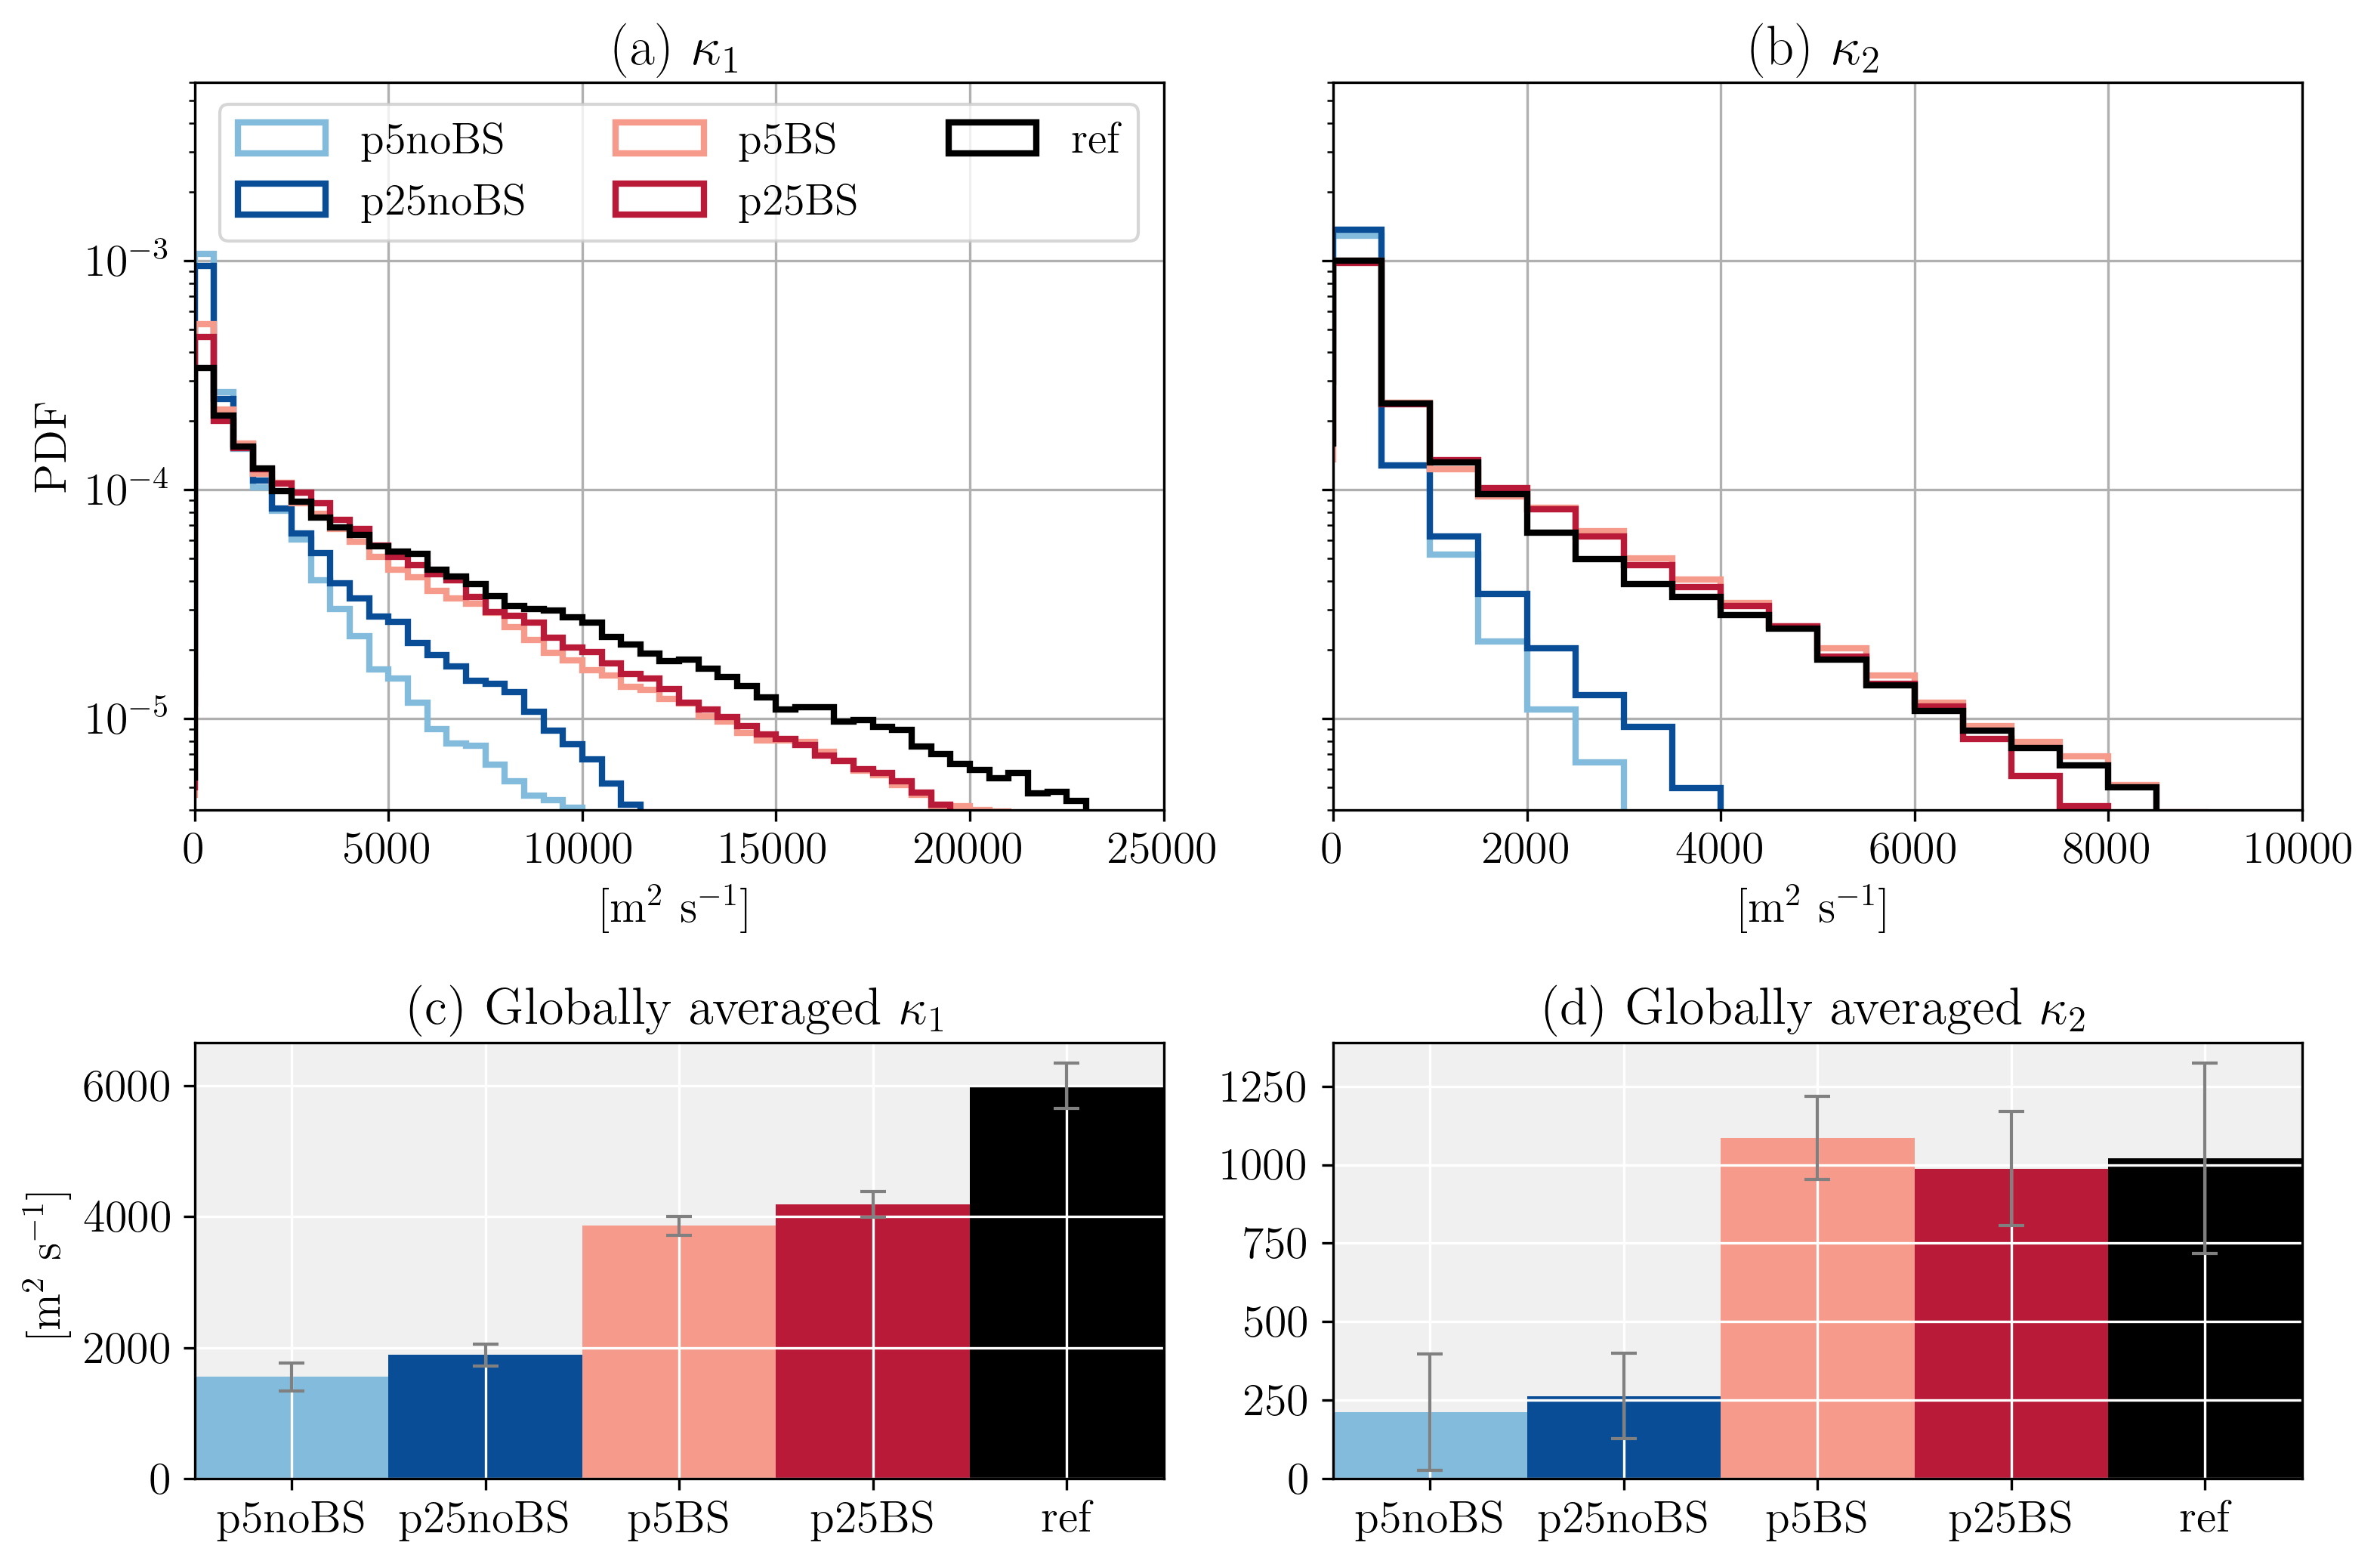

In [11]:
# Create figure
fig = plt.figure(figsize = (12, 8), dpi = 300)  # increased height for new row
gs = gridspec.GridSpec(2, 2, width_ratios = [1, 1], height_ratios = [1, 0.6], wspace = 0.175, hspace = 0.4)
fontsize = 16.5

depth_cond = -4000

# axes
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

# kappa1
max = 2.5e4
min = -1e3
bins = np.arange(-5e3, max + 500, 500)
ax = ax1

kappa = kappa_rho_to_depth(p5_noBS_kappa1, p5_noBS_h, p5_eta, p5_IC, p5_static, 0.5)
ax.hist(kappa.values.flatten(), bins = bins, label = 'p5noBS', histtype = 'step', density = True, facecolor = 'none', edgecolor = colorlist_p5[0], linewidth = 2)

kappa = kappa_rho_to_depth(p25_noBS_kappa1, p25_noBS_h, p25_eta, p25_IC, p25_static, 0.25)
ax.hist(kappa.values.flatten(), bins = bins, label = 'p25noBS', histtype = 'step', density = True, facecolor = 'none', edgecolor = colorlist_p25[0], linewidth = 2)

kappa = kappa_rho_to_depth(p5_SQGBS_kappa1, p5_SQGBS_h, p5_eta, p5_IC, p5_static, 0.5)
ax.hist(kappa.values.flatten(), bins = bins, label = 'p5BS', histtype = 'step', density = True, facecolor = 'none', edgecolor = colorlist_p5[1], linewidth = 2)

kappa = kappa_rho_to_depth(p25_SQGBS_kappa1, p25_SQGBS_h, p25_eta, p25_IC, p25_static, 0.25)
ax.hist(kappa.values.flatten(), bins = bins, label = 'p25BS', histtype = 'step', density = True, facecolor = 'none', edgecolor = colorlist_p25[1], linewidth = 2)

kappa = kappa_rho_to_depth(p03125_kappa1, p03125_h, p03125_eta, p03125_IC, p03125_static, 1/32)
ax.hist(kappa.values.flatten(), bins = bins, label = 'ref', histtype = 'step', density = True, facecolor = 'none', edgecolor = colorlist_p03125[2], linewidth = 2)

ax.set_xlim([0., max])
ax.set_ylim([4e-6, 6e-3])
ax.set_ylabel('PDF', fontsize = fontsize - 2)
ax.set_xlabel('[m$^2$ s$^{-1}$]', fontsize = fontsize - 2)
ax.tick_params(labelsize = fontsize - 2)
ax.set_title('(a) $\kappa_1$', fontsize = fontsize + 1)
ax.grid()
ax.legend(loc = 'upper center', ncol = 3, fontsize = fontsize - 2.5)
ax.set_yscale('log')

ax = ax3
ax.set_facecolor((0.94, 0.94, 0.94))

kappa = np.zeros(5)
kappa[0] = MMT_globally_ave(p5_noBS_kappa1, p5_noBS_h, p5_static, 0.5).item()
kappa[1] = MMT_globally_ave(p25_noBS_kappa1, p25_noBS_h, p25_static, 0.25).item()
kappa[2] = MMT_globally_ave(p5_SQGBS_kappa1, p5_SQGBS_h, p5_static, 0.5).item()
kappa[3] = MMT_globally_ave(p25_SQGBS_kappa1, p25_SQGBS_h, p25_static, 0.25).item()
kappa[4] = MMT_globally_ave(p03125_kappa1, p03125_h, p03125_static, 0.03125).item()

kappa_errs = np.zeros(5)
kappa_errs[0] = MMT_globally_ave(p5_noBS_kappa1_err, p5_noBS_h, p5_static, 0.5).item()
kappa_errs[1] = MMT_globally_ave(p25_noBS_kappa1_err, p25_noBS_h, p25_static, 0.25).item()
kappa_errs[2] = MMT_globally_ave(p5_SQGBS_kappa1_err, p5_SQGBS_h, p5_static, 0.5).item()
kappa_errs[3] = MMT_globally_ave(p25_SQGBS_kappa1_err, p25_SQGBS_h, p25_static, 0.25).item()
kappa_errs[4] = MMT_globally_ave(p03125_kappa1_err, p03125_h, p03125_static, 0.03125).item()

order = [0, 1, 2, 3, 4]
labels = ['p5noBS', 'p25noBS', 'p5BS', 'p25BS', 'ref']
colors = [colorlist_p5[0], colorlist_p25[0], colorlist_p5[1], colorlist_p25[1], colorlist_p03125[2]]
error_style = dict(ecolor = 'gray', lw = 1, capsize = 4, capthick = 1)
bars = ax.bar(order, kappa, yerr = kappa_errs, color = colors, width = 1.0, edgecolor = 'none', error_kw = error_style)

ax.set_xlim(-0.5, 4.5)
ax.grid(True, color = 'white')
ax.set_title('(c) Globally averaged $\kappa_1$', fontsize = fontsize)
ax.set_ylabel('[m$^2$ s$^{-1}$]', fontsize = fontsize - 2)
ax.tick_params(labelsize = fontsize - 2)
ax.set_xticks(order)
ax.set_xticklabels(labels, fontsize = fontsize - 2)

# kappa2
max = 1e4
min = -1e3
bins = np.arange(-5e3, max + 500, 500)

ax = ax2

kappa = kappa_rho_to_depth(p5_noBS_kappa2, p5_noBS_h, p5_eta, p5_IC, p5_static, 0.5)
ax.hist(kappa.values.flatten(), bins = bins, label = 'p5noBS', histtype = 'step', density = True, facecolor = 'none', edgecolor = colorlist_p5[0], linewidth = 2)

kappa = kappa_rho_to_depth(p25_noBS_kappa2, p25_noBS_h, p25_eta, p25_IC, p25_static, 0.25)
ax.hist(kappa.values.flatten(), bins = bins, label = 'p25noBS', histtype = 'step', density = True, facecolor = 'none', edgecolor = colorlist_p25[0], linewidth = 2)

kappa = kappa_rho_to_depth(p5_SQGBS_kappa2, p5_SQGBS_h, p5_eta, p5_IC, p5_static, 0.5)
ax.hist(kappa.values.flatten(), bins = bins, label = 'p5BS', histtype = 'step', density = True, facecolor = 'none', edgecolor = colorlist_p5[1], linewidth = 2)

kappa = kappa_rho_to_depth(p25_SQGBS_kappa2, p25_SQGBS_h, p25_eta, p25_IC, p25_static, 0.25)
ax.hist(kappa.values.flatten(), bins = bins, label = 'p25BS', histtype = 'step', density = True, facecolor = 'none', edgecolor = colorlist_p25[1], linewidth = 2)

kappa = kappa_rho_to_depth(p03125_kappa2, p03125_h, p03125_eta, p03125_IC, p03125_static, 1/32)
ax.hist(kappa.values.flatten(), bins = bins, label = 'ref', histtype = 'step', density = True, facecolor = 'none', edgecolor = colorlist_p03125[2], linewidth = 2)

ax.set_xlim([0., max])
ax.set_ylim([4e-6, 6e-3])
ax.set_ylabel('', fontsize = fontsize)
ax.set_xlabel('[m$^2$ s$^{-1}$]', fontsize = fontsize - 2)
ax.tick_params(labelsize = fontsize - 2)
ax.set_title('(b) $\kappa_2$', fontsize = fontsize + 1)
ax.grid()
ax.set_yscale('log')
ax.tick_params(labelleft = False)

ax = ax4
ax.set_facecolor((0.94, 0.94, 0.94))

kappa = np.zeros(5)
kappa[0] = MMT_globally_ave(p5_noBS_kappa2, p5_noBS_h, p5_static, 0.5).item()
kappa[1] = MMT_globally_ave(p25_noBS_kappa2, p25_noBS_h, p25_static, 0.25).item()
kappa[2] = MMT_globally_ave(p5_SQGBS_kappa2, p5_SQGBS_h, p5_static, 0.5).item()
kappa[3] = MMT_globally_ave(p25_SQGBS_kappa2, p25_SQGBS_h, p25_static, 0.25).item()
kappa[4] = MMT_globally_ave(p03125_kappa2, p03125_h, p03125_static, 0.03125).item()

kappa_errs = np.zeros(5)
kappa_errs[0] = MMT_globally_ave(p5_noBS_kappa2_err, p5_noBS_h, p5_static, 0.5).item()
kappa_errs[1] = MMT_globally_ave(p25_noBS_kappa2_err, p25_noBS_h, p25_static, 0.25).item()
kappa_errs[2] = MMT_globally_ave(p5_SQGBS_kappa2_err, p5_SQGBS_h, p5_static, 0.5).item()
kappa_errs[3] = MMT_globally_ave(p25_SQGBS_kappa2_err, p25_SQGBS_h, p25_static, 0.25).item()
kappa_errs[4] = MMT_globally_ave(p03125_kappa2_err, p03125_h, p03125_static, 0.03125).item()

order = [0, 1, 2, 3, 4]
labels = ['p5noBS', 'p25noBS', 'p5BS', 'p25BS', 'ref']
colors = [colorlist_p5[0], colorlist_p25[0], colorlist_p5[1], colorlist_p25[1], colorlist_p03125[2]]
error_style = dict(ecolor = 'gray', lw = 1, capsize = 4, capthick = 1)
bars = ax.bar(order, kappa, yerr = kappa_errs, color = colors, width = 1.0, edgecolor = 'none', error_kw = error_style)

ax.set_xlim(-0.5, 4.5)
ax.grid(True, color = 'white')
#ax.tick_params(labelleft = False)
ax.set_title('(d) Globally averaged $\kappa_2$', fontsize = fontsize)
ax.tick_params(labelsize = fontsize - 2)
ax.set_xticks(order)
ax.set_xticklabels(labels, fontsize = fontsize - 2)
ax.set_yticks(np.linspace(0, 1250, 6))

plt.savefig('Fig_pdfs_MMT.pdf', bbox_inches = 'tight', dpi = 300)